# practice of pyplot

pyplot is a set of commands to use features from matplotlib.

To install
```
sudo apt-get install python3-matplotlib
```

Tutorial
https://matplotlib.org/tutorials/introductory/pyplot.html#intro-to-pyplot


In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

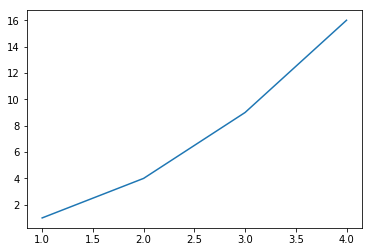

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

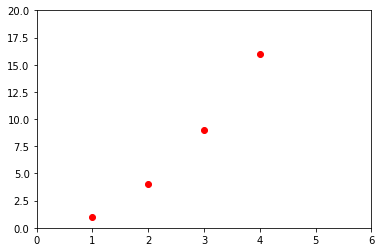

In [3]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0,6,0,20])
plt.show()

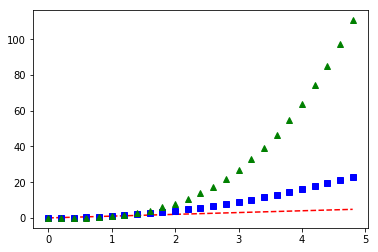

In [4]:
import numpy as np
t = np.arange(0.,5.,0.2)
plt.plot(t,t,'r--',t,t**2,'bs',t,t**3,'g^')
plt.show()

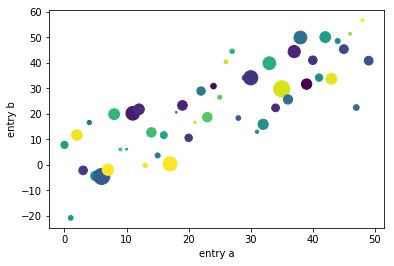

In [5]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

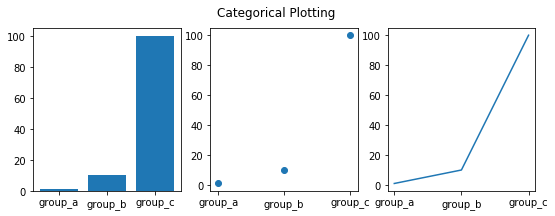

In [6]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

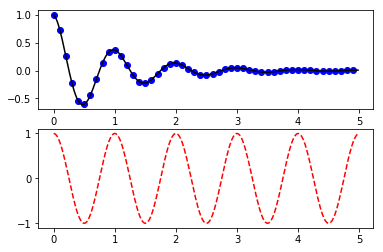

In [7]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

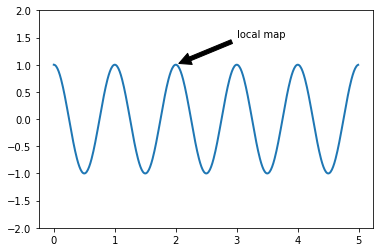

In [8]:
ax = plt.subplot(111)
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
plt.plot(t, s, lw=2)
plt.annotate('local map', xy=(2,1), xytext=(3,1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.ylim(-2,2)
plt.show()

Add legends to LineCollection plot

https://stackoverflow.com/questions/19877666/add-legends-to-linecollection-plot

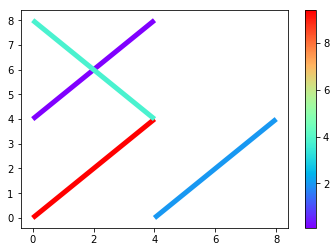

In [9]:
# def f(t):
#     return np.exp(-t) * np.cos(2*np.pi*t)
# t1 = np.arange(0.0, 5.0, 0.1)
# t2 = np.arange(0.0, 5.0, 0.02)
# line1, line2 = plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

import numpy
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# The line format you curently have:
lines = [[(0, 1, 2, 3, 4), (4, 5, 6, 7, 8)],
         [(0, 1, 2, 3, 4), (0, 1, 2, 3, 4)],
         [(0, 1, 2, 3, 4), (8, 7, 6, 5, 4)],
         [(4, 5, 6, 7, 8), (0, 1, 2, 3, 4)]]

# Reformat it to what `LineCollection` expects:
lines = [list(zip(x, y)) for x, y in lines]

z = np.array([0.1, 9.4, 3.8, 2.0])

fig, ax = plt.subplots()
lines = LineCollection(lines, array=z, cmap=plt.cm.rainbow, linewidths=5)
ax.add_collection(lines)
fig.colorbar(lines)

# Manually adding artists doesn't rescale the plot, so we need to autoscale
ax.autoscale()

plt.show()

# marker types

https://matplotlib.org/api/markers_api.html#module-matplotlib.markers

# color maps

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

# for latex
```
sudo apt install dvipng
```


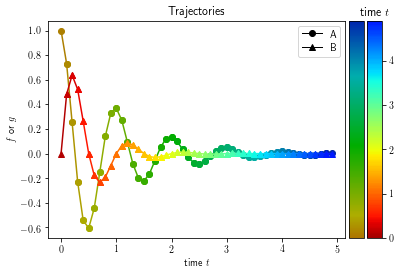

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import colorsys
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import copy

mpl.rcParams['text.usetex'] = True

t = np.arange(0.0, 5.0, 0.1)
maxt = max(t)

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
def g(t):
    return np.exp(-2*t) * np.sin(2*np.pi*t)

def cm1f(val): # original
    val /= maxt
    h1 = 227/360
    h2 = 40/360
    h = (1-val)*(h2-h1)+h1
    return np.array(list(colorsys.hsv_to_rgb(h,1,0.68)) + [1])

def cm2f(val): # kind of new
    val /= maxt
    return plt.cm.jet(0.97-val*0.82)

def plotPath(points, style, cm):
    for i in range(1,len(points)):
        p_prev = points[i-1]
        p = points[i]
        plt.plot([p_prev[0], p[0]], [p_prev[1], p[1]], style, color=cm(p[0]))

fig, ax = plt.subplots()
ax.set_title('Trajectories')

# plot1
cm1 = copy.deepcopy(plt.cm.get_cmap('rainbow'))
cm1._init()
cm1._lut = np.array([cm1f(x) for x in np.linspace(0, maxt, cm1.N)])
mpl.cm.register_cmap(name='cm1', cmap=cm1)
plotPath(list(zip(t, f(t))), '-o', cm1f)

# plot2
cm2 = copy.deepcopy(plt.cm.get_cmap('rainbow'))
cm2._init()
cm2._lut = np.array([cm2f(x) for x in np.linspace(0, maxt, cm2.N)])
mpl.cm.register_cmap(name='cm2', cmap=cm2)
plotPath(list(zip(t, g(t))), '-^', cm2f)

# labes
plt.ylabel('$f$ or $g$')
plt.xlabel('time $t$')

# legends
legend_elements = [Line2D([0], [0], color='k', lw=1, marker='o', label='A'),
                   Line2D([0], [0], color='k', lw=1, marker='^', label='B')]
ax.legend(handles=legend_elements, loc='upper right')
# colorbar
divider = make_axes_locatable(plt.gca())
norm = mpl.colors.Normalize(vmin = 0, vmax = maxt)
ax_cb1 = divider.new_horizontal(size="5%", pad=0.05)
ax_cb1.set_axis_off() # hide the axis of the first colorbar
cb1 = mpl.colorbar.ColorbarBase(ax_cb1, cmap='cm1', norm=norm, orientation='vertical')
plt.gcf().add_axes(ax_cb1)
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)
ax_cb2.set_title('time $t$')
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap='cm2', norm=norm, orientation='vertical')
plt.gcf().add_axes(ax_cb2)

plt.show()

plotting ground-truth of robot 1...
plotting ground-truth of robot 2...
plotting ground-truth of robot 3...
plotting ground-truth of robot 4...
plotting ground-truth of robot 5...
plotting ground-truth of robot 6...
plotting ground-truth of robot 7...
plotting ground-truth of robot 8...
plotting estimation of robot 1...
plotting estimation of robot 2...
plotting estimation of robot 3...
plotting estimation of robot 4...
plotting estimation of robot 5...
plotting estimation of robot 6...
plotting estimation of robot 7...
plotting estimation of robot 8...
plotting particles of robot 1...
plotting particles of robot 2...
plotting particles of robot 3...
plotting particles of robot 4...
plotting particles of robot 5...
plotting particles of robot 6...
plotting particles of robot 7...
plotting particles of robot 8...
plotting arrows of robot 1...
plotting arrows of robot 2...
plotting arrows of robot 3...
plotting arrows of robot 4...
plotting arrows of robot 5...
plotting arrows of robot 6

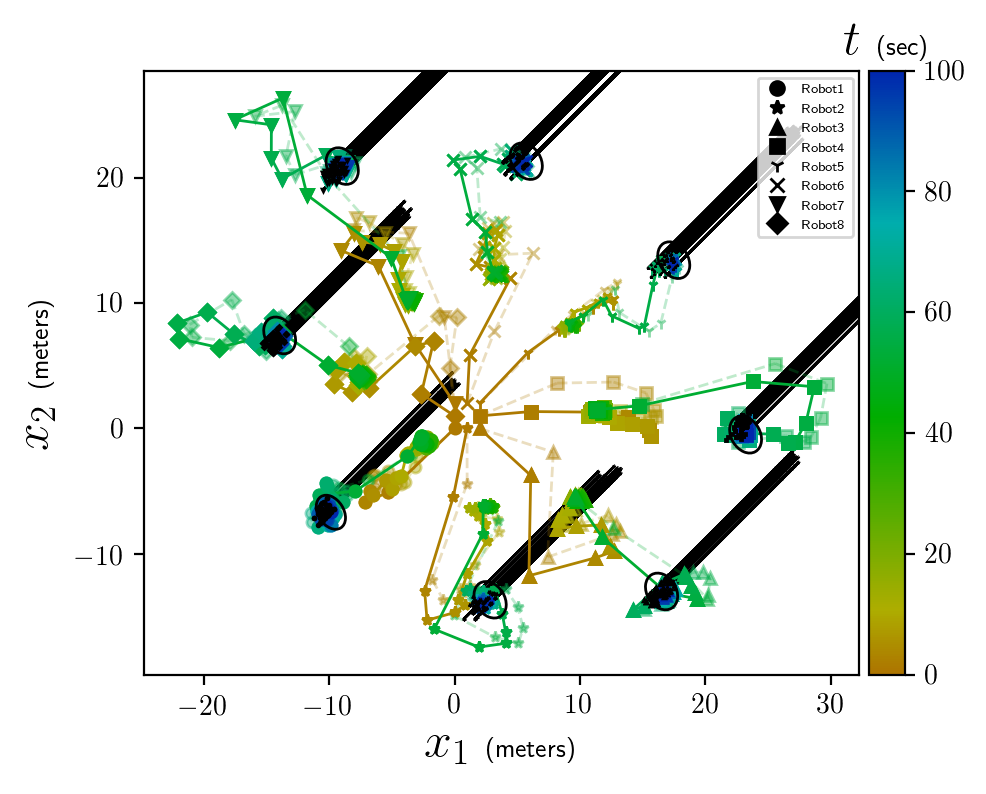

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import colorsys
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import copy
import matplotlib.patches as mpatches

mpl.rcParams['text.usetex'] = True

cm_new = False

# load data
f = open('output.dat', 'r')
data = np.array([[float(v) for v in line.split()] for line in f])
f.close()

maxt = data[-1][0]

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
def g(t):
    return np.exp(-2*t) * np.sin(2*np.pi*t)

def cmf(val):
    if cm_new:
        val /= maxt
        return plt.cm.jet(0.97-val*0.82)
    else:
        val /= maxt
        h1 = 227/360
        h2 = 40/360
        h = (1-val)*(h2-h1)+h1
        return np.array(list(colorsys.hsv_to_rgb(h,1,0.68)) + [1])

subtle_alpha = 0.25
def cmf_s(val):
    if cm_new:
        val /= maxt
        c = plt.cm.jet(0.97-val*0.82)
        c[3] = subtle_alpha
        return c
    else:
        val /= maxt
        h1 = 227/360
        h2 = 40/360
        h = (1-val)*(h2-h1)+h1
        return np.array(list(colorsys.hsv_to_rgb(h,1,0.68)) + [subtle_alpha])

# def cm1f(val): # original
#     val /= maxt
#     h1 = 227/360
#     h2 = 40/360
#     h = (1-val)*(h2-h1)+h1
#     return np.array(list(colorsys.hsv_to_rgb(h,1,0.68)) + [1])

# def cm2f(val): # kind of new
#     val /= maxt
#     return plt.cm.jet(0.97-val*0.82)

def plotPath(points, style, cm, lw=1, ms=5):
    # p[0]: x_1
    # p[1]: x_2
    # p[2]: t
    for i in range(1,len(points)):
        p_prev = points[i-1]
        p = points[i]
        plt.plot(
            [p_prev[0], p[0]],
            [p_prev[1], p[1]],
            style if '-' in style else '-' + style,
            color=cm(p[2]),
            linewidth=lw,
            markersize=ms)

# custom colormap
cm = copy.deepcopy(plt.cm.get_cmap('jet'))
cm._init()
cm._lut = np.array([cmf(x) for x in np.linspace(0, maxt, cm.N)])
mpl.cm.register_cmap(name='cm', cmap=cm)

cm_s = copy.deepcopy(plt.cm.get_cmap('jet'))
cm_s._init()
cm_s._lut = np.array([cmf_s(x) for x in np.linspace(0, maxt, cm_s.N)])
mpl.cm.register_cmap(name='cm_s', cmap=cm)

# prep figure
fig, ax = plt.subplots()
#fig.set_size_inches(6,5)
fig.set_dpi(200)
# ax.set_aspect('equal')
#ax.set_title('Trajectories')

# markers
markers = [
    'o', '*', '^', 's', '1', 'x', 'v', 'D', '1', '+'
]

# plot ground-truth
for i in range(8):
    print('plotting ground-truth of robot ' + str(i+1) + '...')
    plotPath(
        np.concatenate(
            (data[:,1+10*i:2+10*i],
             data[:,2+10*i:3+10*i],
             data[:,0:1]),axis=1).tolist(),
        markers[i]+'--', cmf_s, lw=1, ms=4)
# plot estimated trajectories
for i in range(8):
    print('plotting estimation of robot ' + str(i+1) + '...')
    plotPath(
        np.concatenate(
            (data[:,3+10*i:4+10*i],
             data[:,4+10*i:5+10*i],
             data[:,0:1]),axis=1).tolist(),
        markers[i], cmf, lw=1, ms=4)

#plot particles
f = open('particles.dat', 'r')
pdata = np.array([[float(v) for v in line.split()] for line in f])
f.close()
for i in range(8):
    print('plotting particles of robot ' + str(i+1) + '...')
    plt.plot(
        pdata[:,0+2*i:1+2*i].tolist(), pdata[:,1+2*i:2+2*i].tolist(),
        markers[i], color='black', linewidth=0.5, markersize=1)
n_particles = len(pdata[:,0+2*i:1+2*i].tolist())
for i in range(8):
    print('plotting arrows of robot ' + str(i+1) + '...')
    for j in range(n_particles):
        plt.arrow(
            pdata[j,2*i], pdata[j,1+2*i], 10, 10)

# fix the ratio
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ratio = abs((xright-xleft)/(ybottom-ytop))
ax.set_aspect(1)

# labels
plt.ylabel(r'$x_2$ \small{(meters)}', fontsize=18)
plt.xlabel(r'$x_1$ \small{(meters)}', fontsize=18)

# colorbar
print('adding colorbar...')
divider = make_axes_locatable(plt.gca())
norm = mpl.colors.Normalize(vmin = 0, vmax = maxt)
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
ax_cb.set_title('$t$ \small{(sec)}', fontsize=18)
cb = mpl.colorbar.ColorbarBase(ax_cb, cmap='cm', norm=norm, orientation='vertical')
plt.gcf().add_axes(ax_cb)

# legends
print('adding legends...')
# legend_elements = [
#     Line2D([0], [0],
#         color='k', lw=1,
#         linestyle='--',
#         marker=markers[i],
#         markersize=5, label='R'+str(i+1)) for i in range(8)]
# legend_elements += [
#     Line2D([0], [0],
#         color='k', lw=1,
#         marker=markers[i],
#         markersize=8, label='Est'+str(i+1)) for i in range(8)]
legend_elements = [
    Line2D([0], [0],
        color='k', lw=1,
        linestyle='',
        marker=markers[i],
        markersize=5, label='Robot'+str(i+1)) for i in range(8)]
ax.legend(
    handles=legend_elements,
    loc='best',
    fontsize=5)

# add covariances
print('adding covariances...')
def addEllipse(center, r1, r2, deg):
    center = np.array(center)
    major_ax = r1
    minor_ax = r2
    angle_deg = deg
    patch = mpatches.Ellipse(center, major_ax, minor_ax, angle_deg, fc='none', ls='solid', ec='k', lw='1', zorder=100)
    ax.add_patch(patch)

addEllipse([-9.858575, -6.680041], 2.032165, 2.947533, -147.412999)
addEllipse([2.839235,-13.660898], 2.312451, 3.119572, -147.747978)
addEllipse([16.509560,-12.995955], 2.336615, 3.112949, -148.956436)
addEllipse([23.209011,-0.489906], 2.311018, 3.131117, -149.751358)
addEllipse([17.484653,13.419286], 2.289002, 3.132982, -148.374574)
addEllipse([5.718702,21.310952], 2.311551, 3.121762, -147.540136)
addEllipse([-8.953477,20.922109], 2.338399, 3.110578, -148.543506)
addEllipse([-13.940286,7.419833], 2.304822, 3.122547, -149.418722)

# show the figure
print('showing the figure...')
plt.show()

# save the figure
#fig.savefig('result.png')